#                                          Customer Churn Analysis

Project Overview:   


The project aims to analyze customer churn in a
telecommunications company and develop
predictive models to identify at-risk customers. The
ultimate goal is to provide actionable insights and
recommendations to reduce churn and improve
customer retention.

# Task 1  : Data Cleaning and Preprocessing

  
1- Handle missing values in the dataset.     
2- Convert categorical variables into numerical representations using techniques like one-hot encoding.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
telco = pd.read_csv("C:/Users/ma983/OneDrive/Desktop/major project/Telco_Customer_Churn_Dataset .csv")
telco.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1596,7321-VGNKU,Female,0,Yes,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.35,120.25,No
5989,5567-WSELE,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.60,279.55,Yes
3538,9028-LIHRP,Male,0,Yes,Yes,71,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),100.20,7209,No
3566,9677-AVKED,Female,0,No,Yes,53,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,84.60,4449.75,No
1420,8785-CJSHH,Female,0,Yes,No,60,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.80,5985.75,No


In [3]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


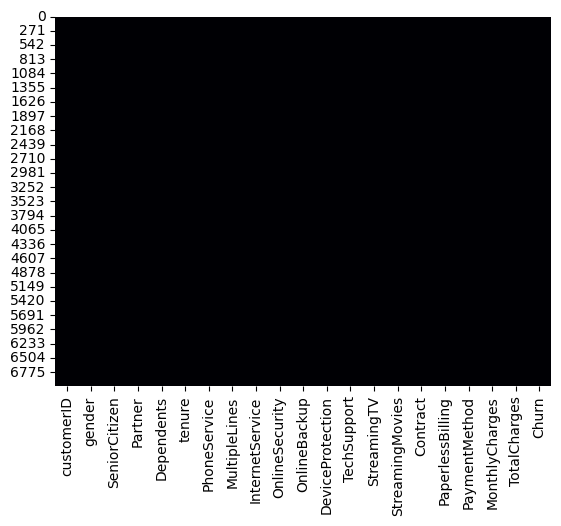

In [4]:
sns.heatmap(telco.isnull(),cmap = 'magma',cbar = False);

In [5]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
telco.shape

(7043, 21)

In [8]:
telco.duplicated().sum()

0

In [6]:
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')
telco['TotalCharges'].dtype

dtype('float64')

In [10]:
telco['TotalCharges'].isnull().sum()

11

In [11]:
telco['tenure'].isin([0]).sum()

11

In [12]:
print(telco[telco['tenure'].isin([0])].index)
print(telco[telco['TotalCharges'].isna()].index)

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')
Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


In [13]:
telco.loc[:,'TotalCharges'] = telco.loc[:,'TotalCharges'].replace(np.nan,0)
telco['TotalCharges'].isnull().sum()

0

In [14]:
telco["SeniorCitizen"] = telco["SeniorCitizen"].replace({0: "No", 1: "Yes"})

In [15]:
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [16]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
telco[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [17]:
for col in telco.select_dtypes('object').columns:
    print(col, '\n')
    print(telco[col].value_counts(), '\n')

customerID 

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64 

gender 

Male      3555
Female    3488
Name: gender, dtype: int64 

SeniorCitizen 

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64 

Partner 

No     3641
Yes    3402
Name: Partner, dtype: int64 

Dependents 

No     4933
Yes    2110
Name: Dependents, dtype: int64 

PhoneService 

Yes    6361
No      682
Name: PhoneService, dtype: int64 

MultipleLines 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

InternetService 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

OnlineSecurity 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

OnlineBackup 

No              

Hot-One-Encoding

In [18]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform = 'pandas')
ohetransfer = ohe.fit_transform(telco[['Contract']])
ohetransfer

,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
7038,0.0,1.0,0.0
7039,0.0,1.0,0.0
7040,1.0,0.0,0.0
7041,1.0,0.0,0.0


In [19]:
pd.get_dummies(telco,columns=['Contract'])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,Yes,Electronic check,29.85,29.85,No,1,0,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,Mailed check,56.95,1889.50,No,0,1,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,Yes,Mailed check,53.85,108.15,Yes,1,0,0
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,No,No,No,Bank transfer (automatic),42.30,1840.75,No,0,1,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,Electronic check,70.70,151.65,Yes,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Mailed check,84.80,1990.50,No,0,1,0
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Credit card (automatic),103.20,7362.90,No,0,1,0
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Yes,Electronic check,29.60,346.45,No,1,0,0
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Yes,Mailed check,74.40,306.60,Yes,1,0,0


# Task 2 : Exploratory Data Analysis (EDA)


1- Calculate and visualize the overall churn rate.  
2- Explore customer distribution by various demographics.  
3- Analyze tenure distribution.   
4- Investigate relationships between churn and different contract types/payment methods.

In [20]:
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [21]:
telco.groupby("Churn").count()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
Churn,,,,,,,,,,,,,,,,,,,,
No,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174
Yes,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869


In [22]:
telco["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

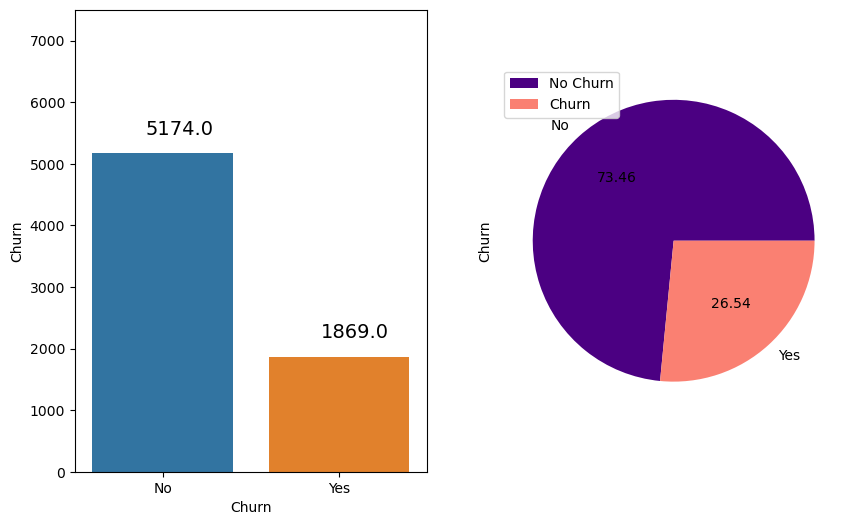

In [15]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
ax = sns.countplot(x="Churn", data=telco)

plt.xlabel("Churn")
plt.ylabel("Churn")
plt.ylim(0,7500)
plt.xticks([0,1], ['No', 'Yes'])
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 14)
    


plt.subplot(1,2,2)
telco['Churn'].value_counts().plot(kind='pie', autopct='%.2f', colors = ['indigo','salmon'])

plt.legend(labels=['No Churn', 'Churn'])
plt.show()

In [9]:
demo_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

serv_features1= ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup'
                , 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

cat_accinfo_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']

num_accinfo_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

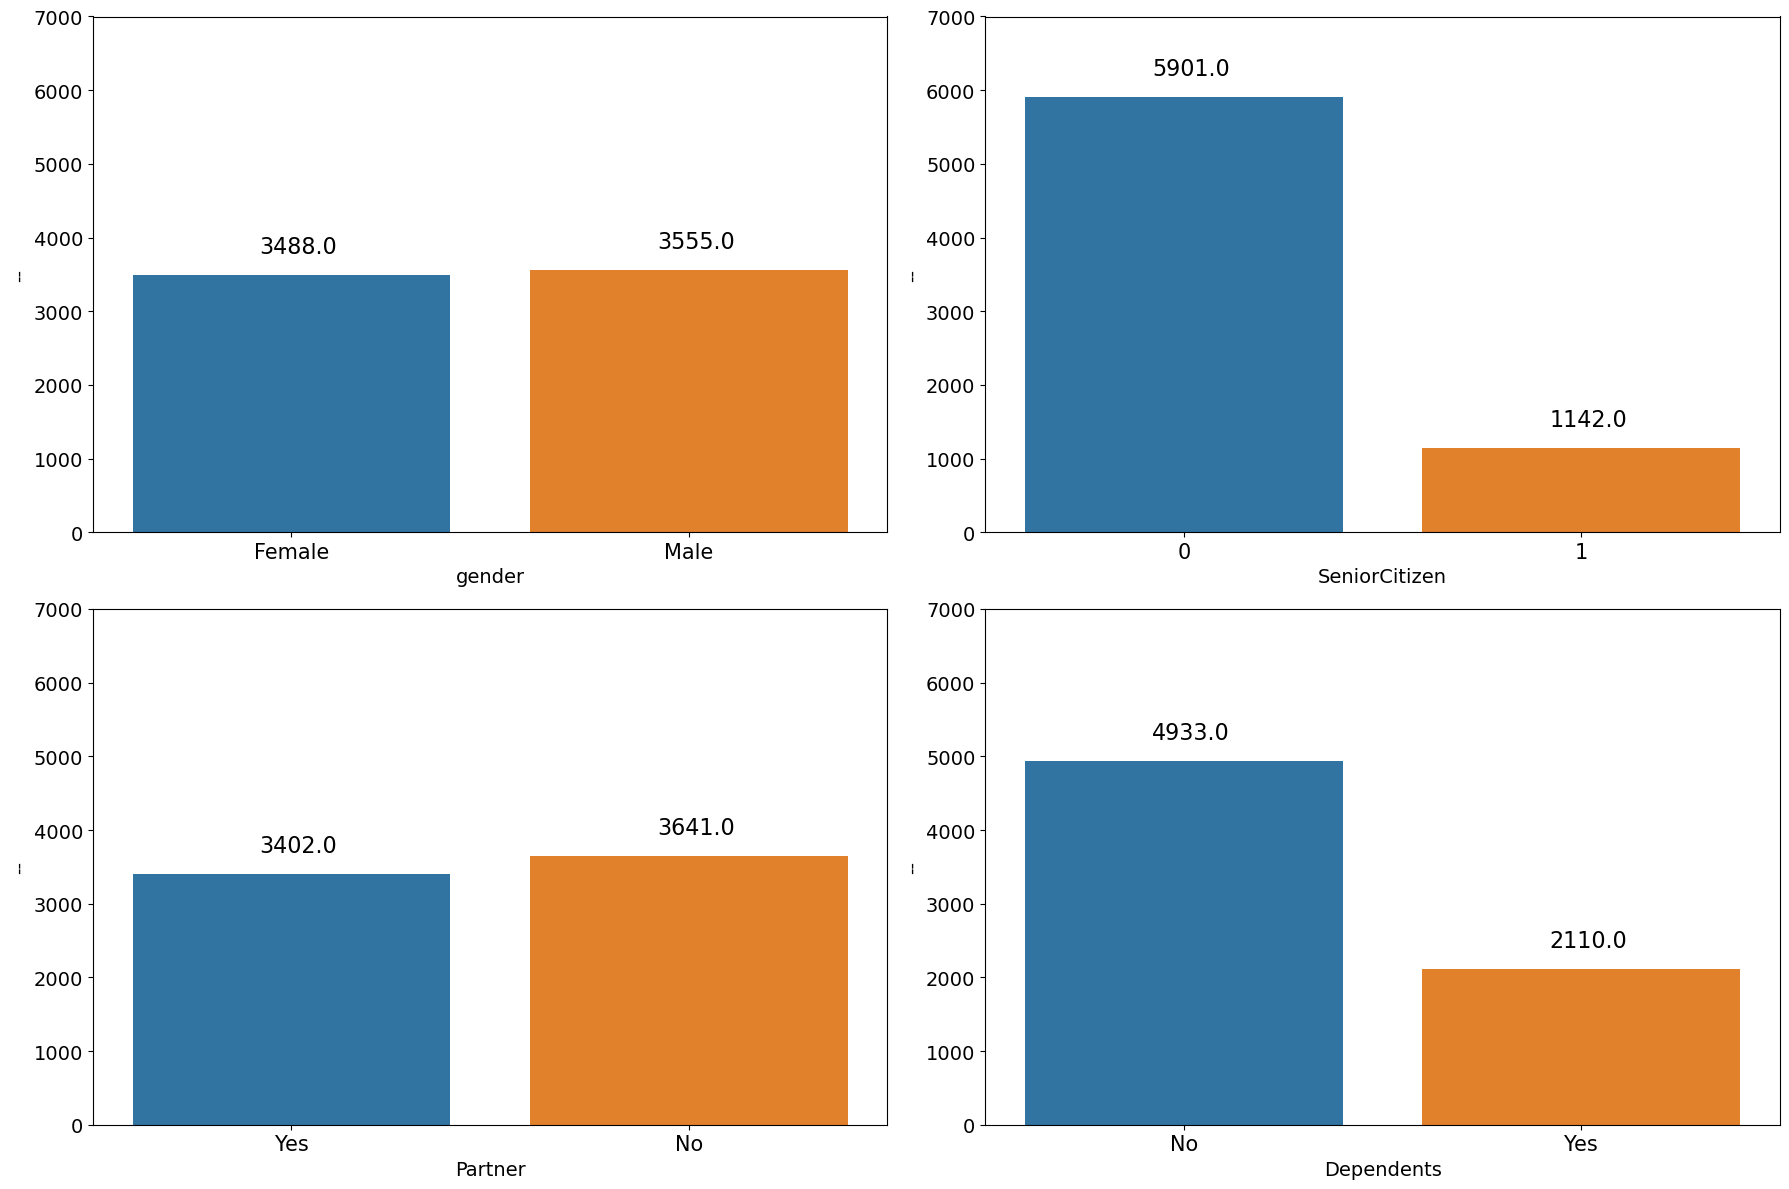

In [17]:
plt.figure(figsize=(18,12))

for i,col in enumerate(demo_features):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(data = telco, x = col)

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("--", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+300), fontsize= 16)

plt.tight_layout()

plt.show()

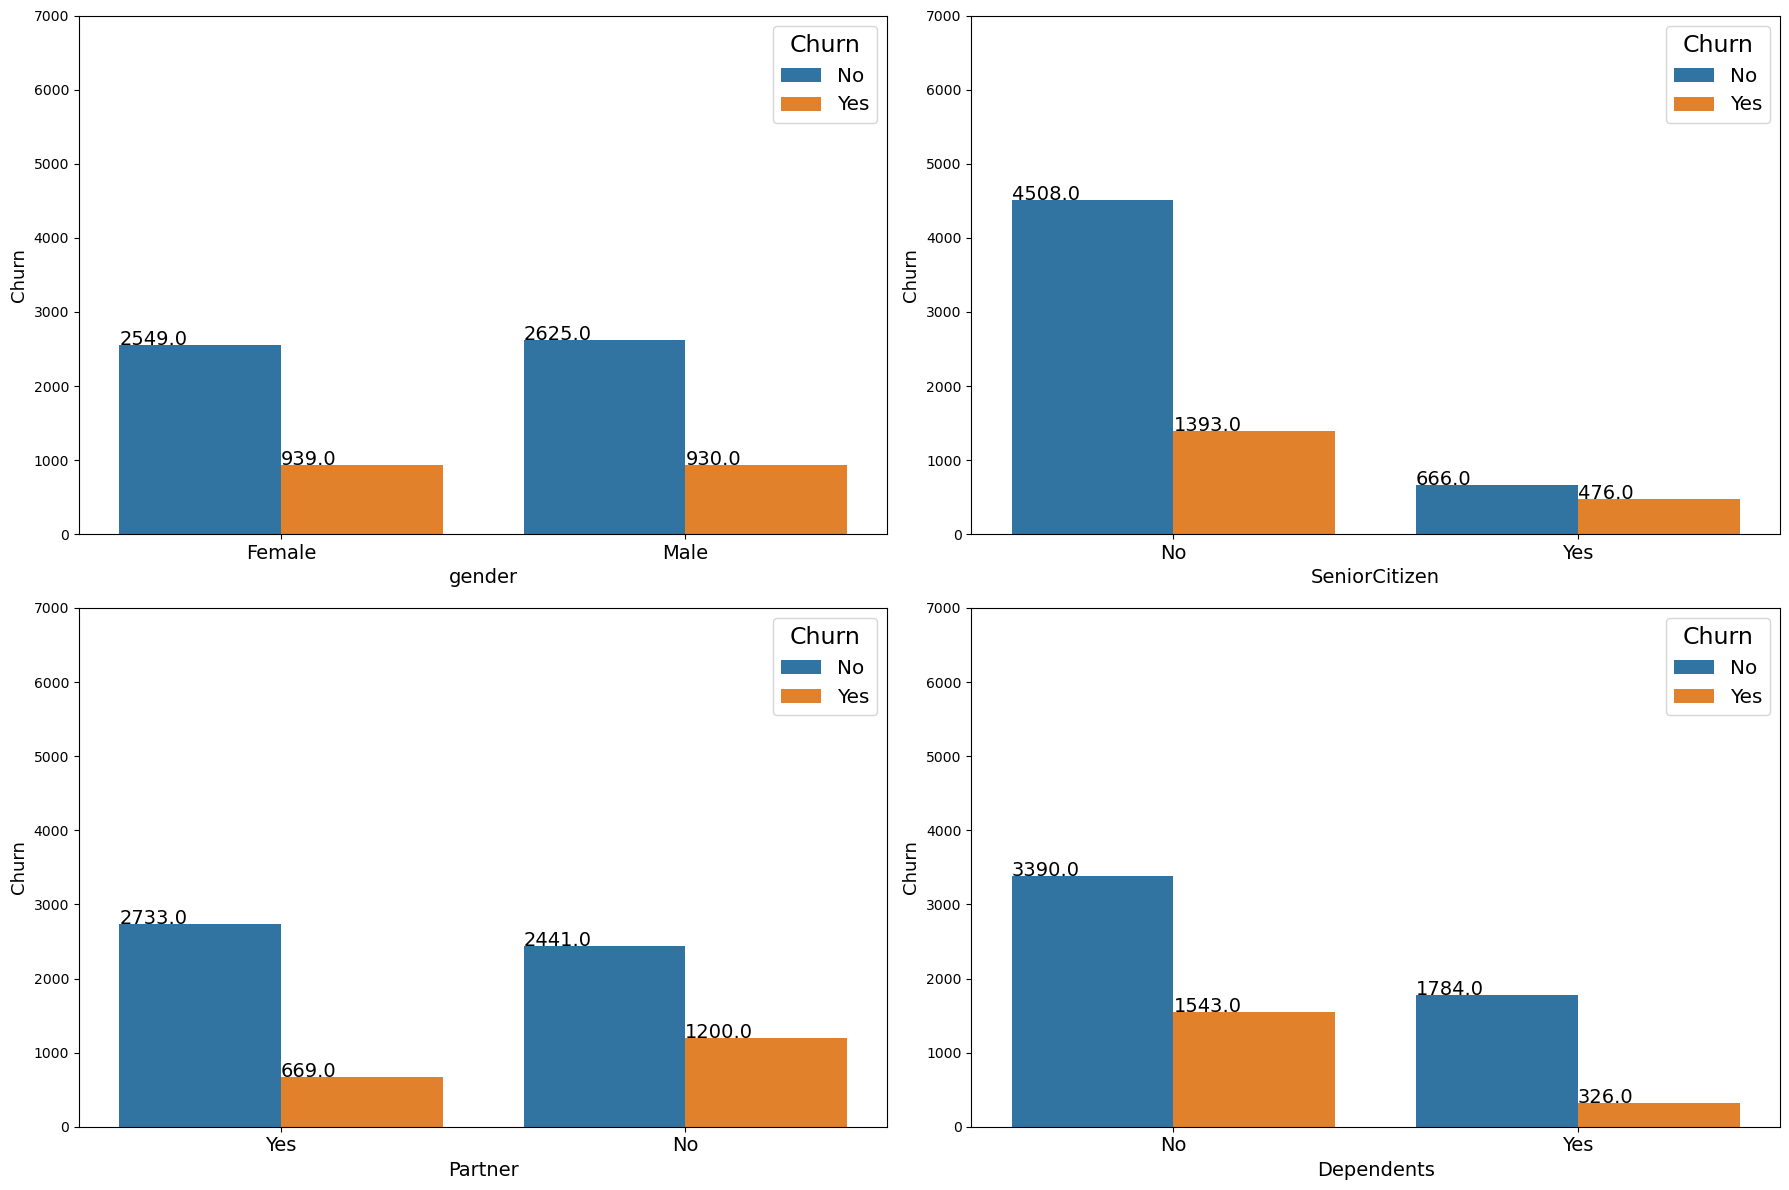

In [63]:
plt.figure(figsize=(18,12))

for i,col in enumerate(demo_features):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(data = telco, x = col, hue="Churn")

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Churn", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)
    
    plt.legend(title = 'Churn', fontsize='x-large', title_fontsize='17')
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x(), p.get_height()), fontsize= 14)

plt.tight_layout()

plt.show()

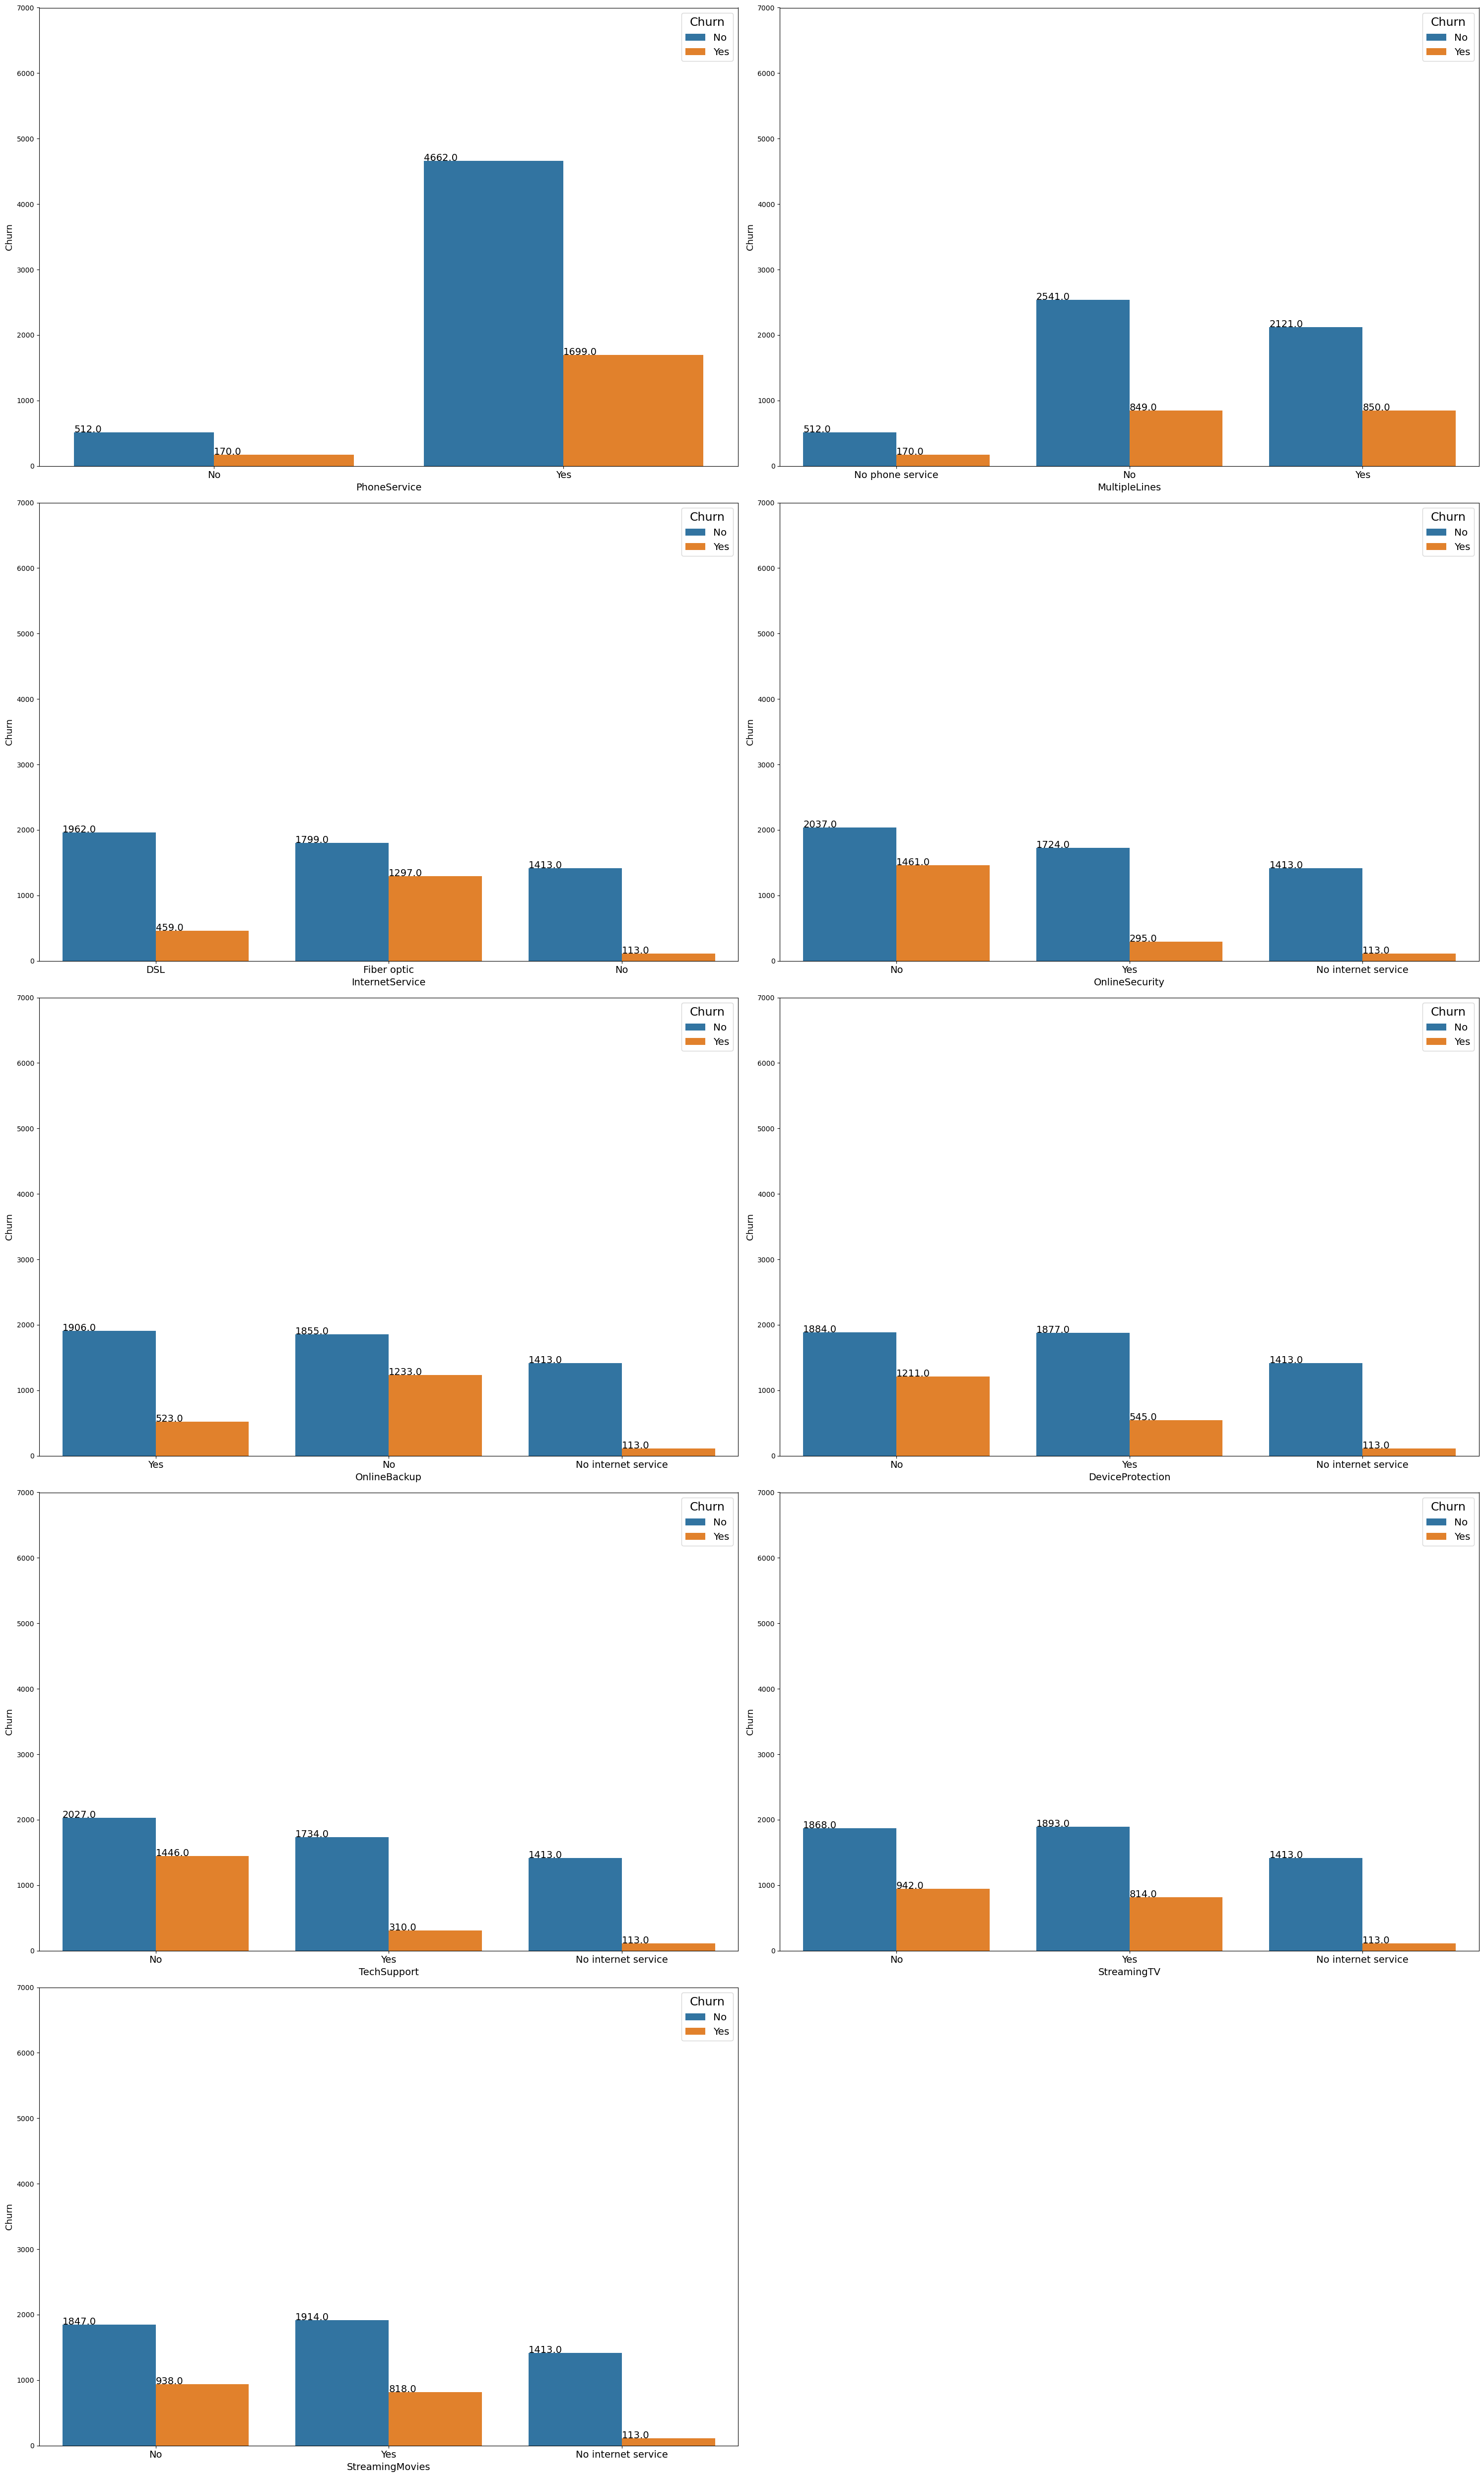

In [25]:
plt.figure(figsize=(30,50))

for i,col in enumerate(serv_features1):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(data = telco, x = col, hue="Churn")

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Churn", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)
    
    plt.legend(title = 'Churn', fontsize='x-large', title_fontsize='17')
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x(), p.get_height()), fontsize= 14)

plt.tight_layout()

plt.show()

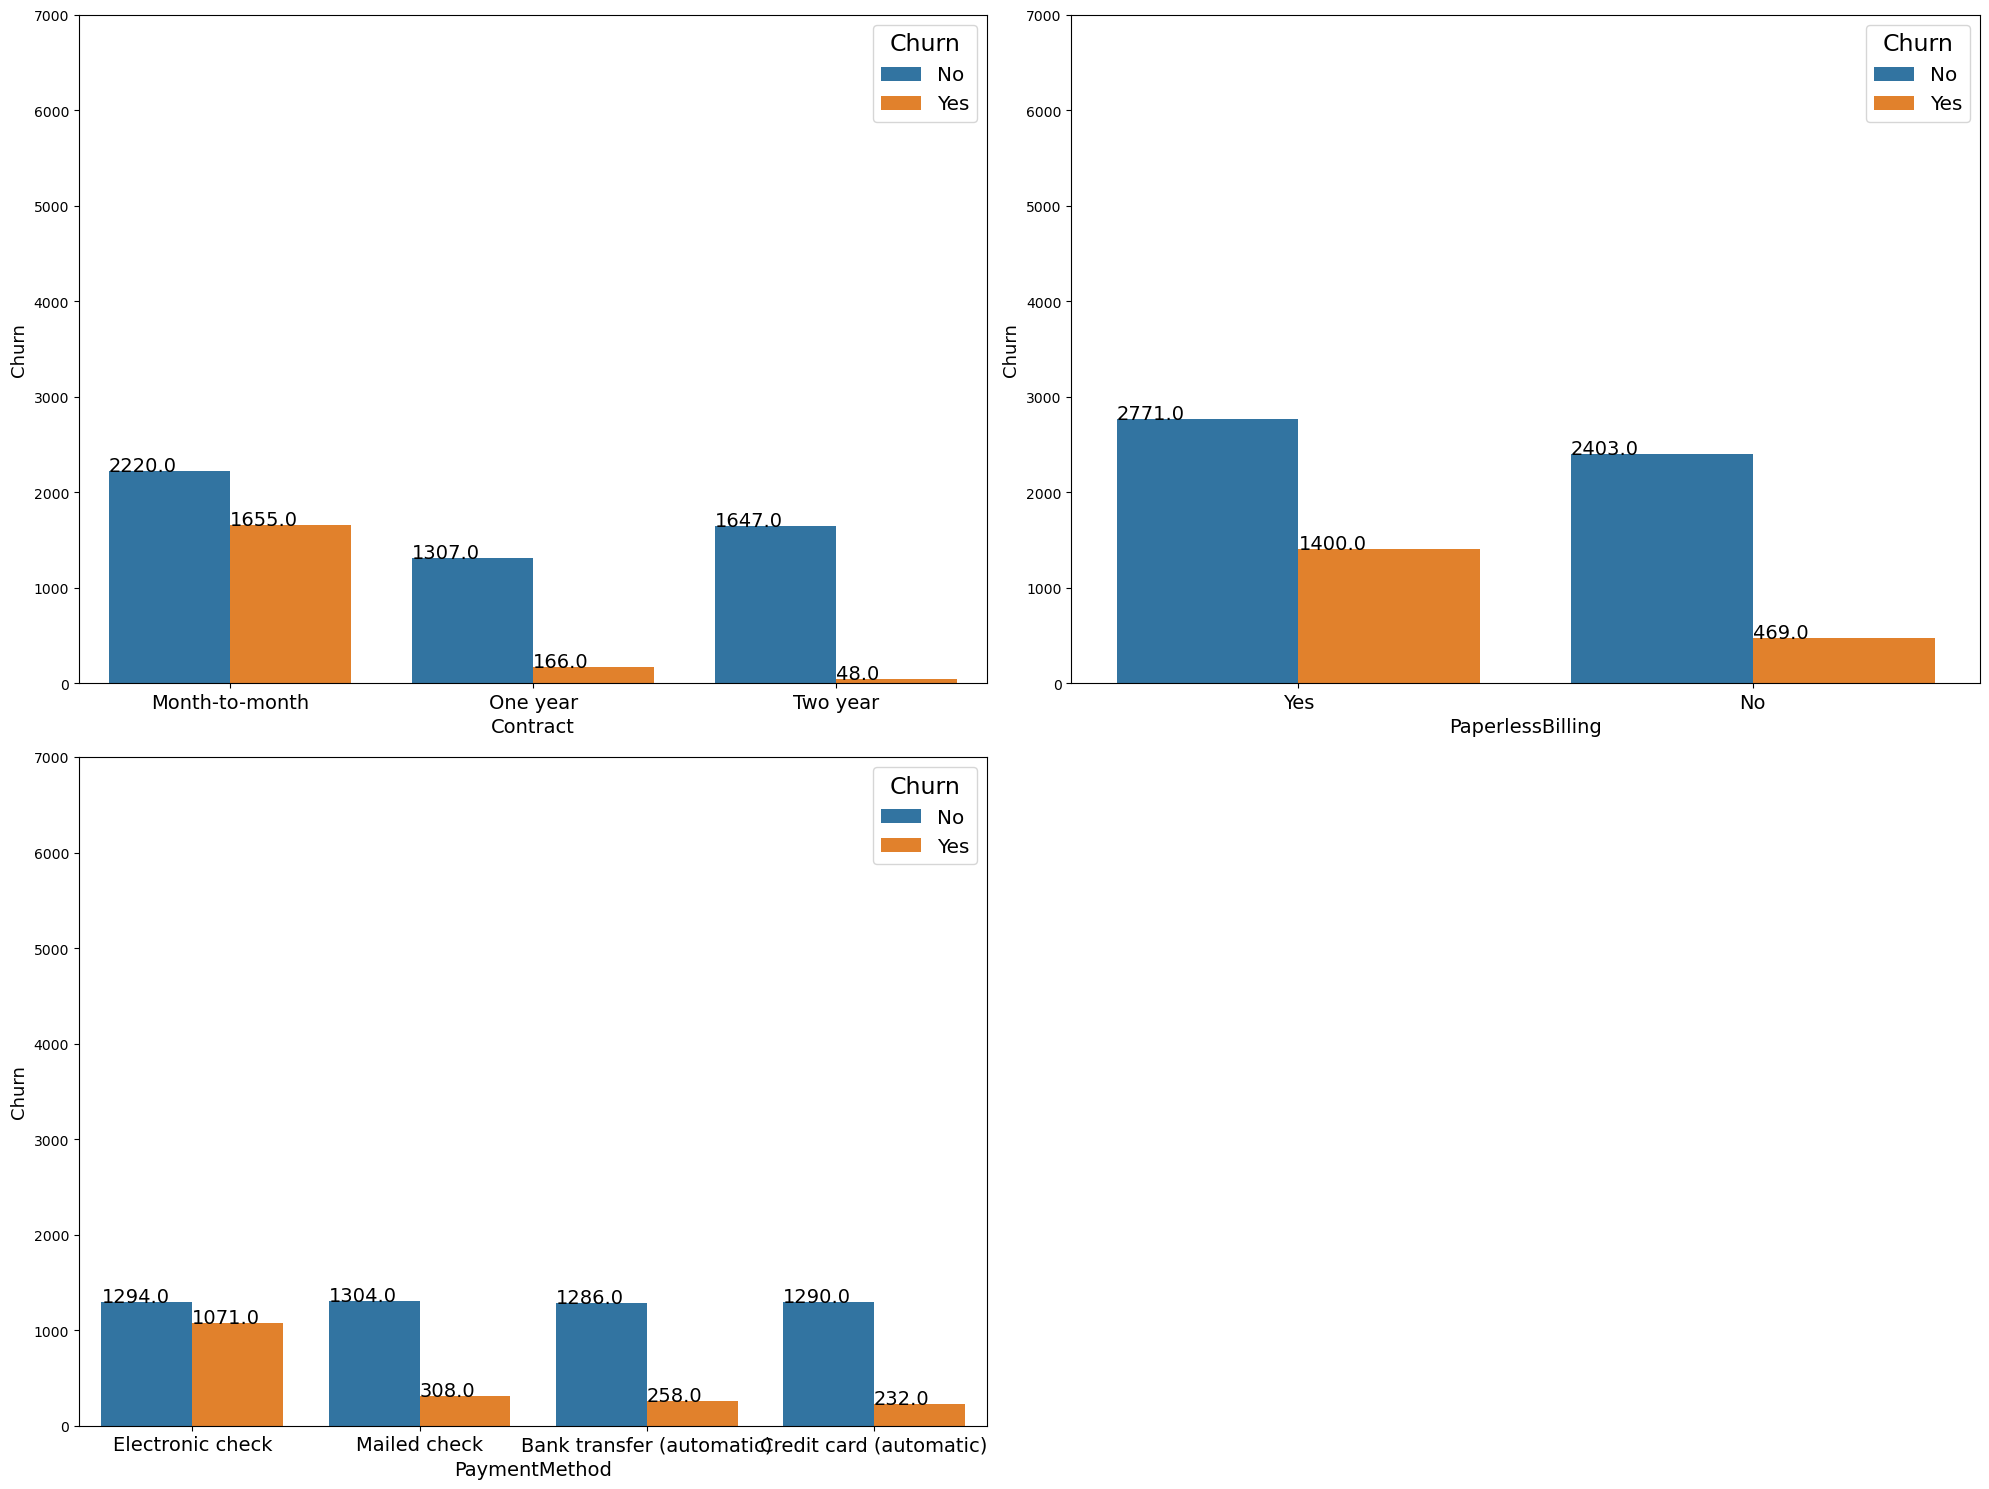

In [62]:
plt.figure(figsize=(20,15))

for i,col in enumerate(cat_accinfo_features):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(data = telco, x = col, hue="Churn")

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Churn", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)
    
    plt.legend(title = 'Churn', fontsize='x-large', title_fontsize='17')
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x(), p.get_height()), fontsize= 14)

plt.tight_layout()

plt.show()

<Axes: >

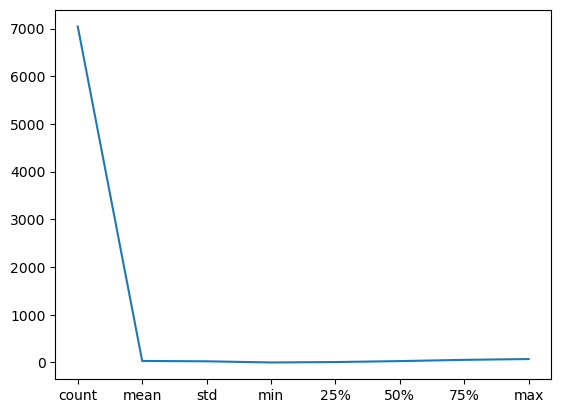

In [28]:
telco["tenure"].describe().plot(kind="line")

In [29]:
telco["tenure"].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [30]:
telco.groupby("tenure").count()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
tenure,,,,,,,,,,,,,,,,,,,,
0,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
1,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613
2,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238
3,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
4,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
69,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95
70,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119


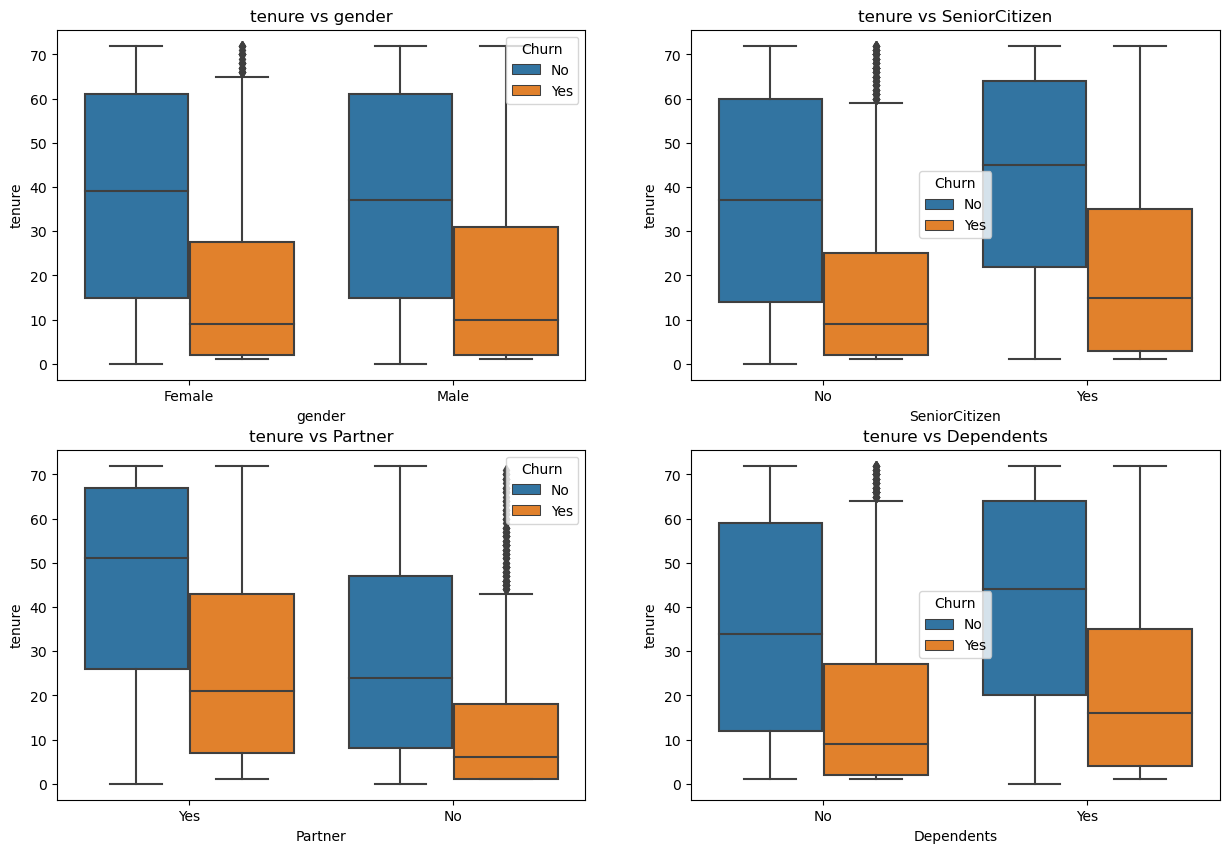

In [31]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = demo_features[i],y = 'tenure',data = telco,hue = 'Churn');
    plt.title('tenure vs ' + demo_features[i]);

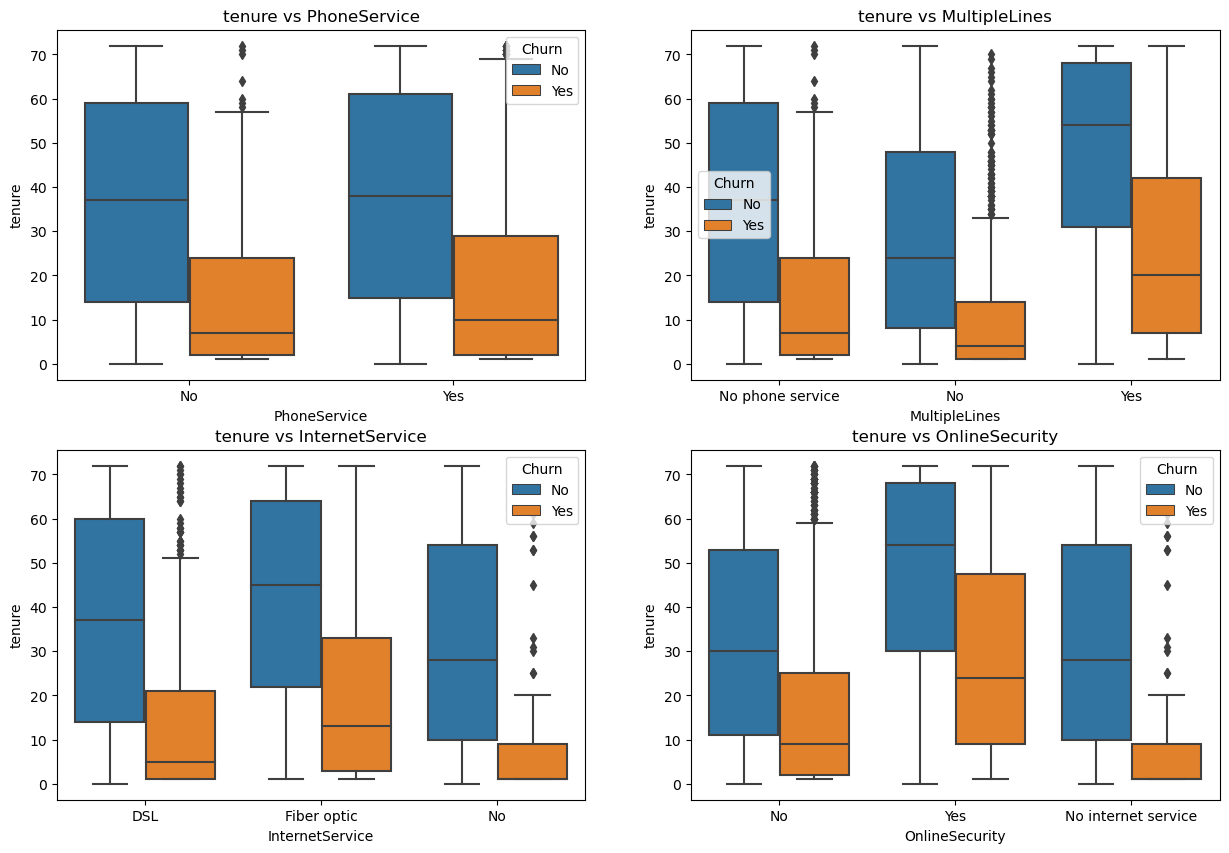

In [32]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = serv_features1[i],y = 'tenure',data = telco,hue = 'Churn');
    plt.title('tenure vs ' + serv_features1[i]);

# Task 3 : Customer Segmentation

1- Segment customers based on tenure,monthly charges, and contract type.  
2- Analyze churn rates across these segments.

In [33]:
telco.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [34]:
telco["MonthlyCharges"].nunique()

1585

C:\Users\ma983\AppData\Local\Temp\ipykernel_36192\924517710.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco[num_accinfo_features[i]])
C:\Users\ma983\AppData\Local\Temp\ipykernel_36192\924517710.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco[num_accinfo_features[i]])
C:\Users

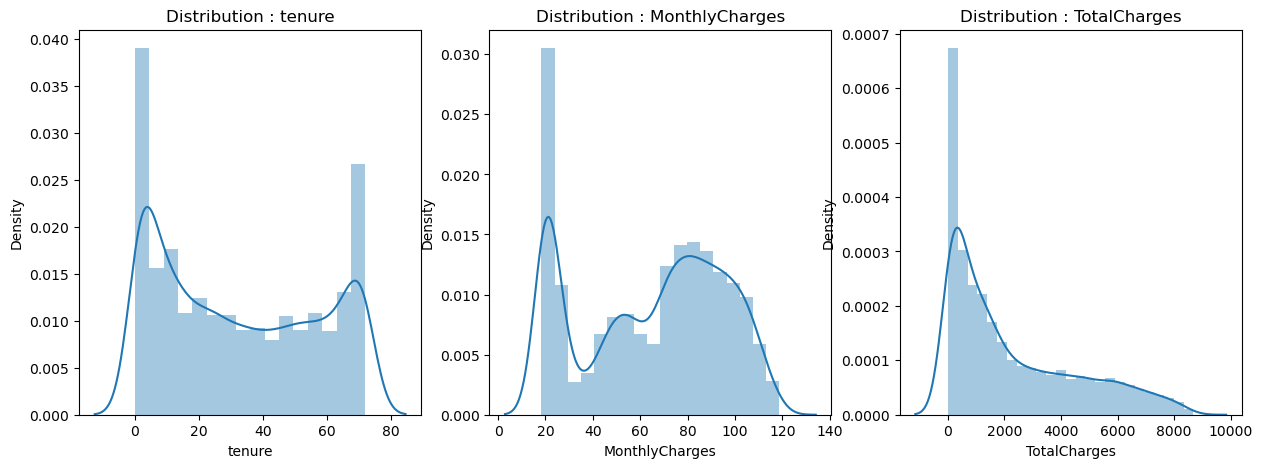

In [35]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(len(num_accinfo_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(telco[num_accinfo_features[i]])
    title = 'Distribution : ' + num_accinfo_features[i]
    plt.title(title)
plt.show()


In [36]:
telco['tenureg'] = pd.qcut(telco['tenure'], q = 3)
telco['Monthlycharge'] = pd.qcut(telco['MonthlyCharges'], q = 3)

In [37]:
print(telco.groupby('tenureg')['MonthlyCharges'].mean())
print(telco.groupby(['tenureg','Contract'])['customerID'].count())

tenureg
(-0.001, 14.0]    56.490953
(14.0, 47.0]      64.371190
(47.0, 72.0]      73.678333
Name: MonthlyCharges, dtype: float64
tenureg         Contract      
(-0.001, 14.0]  Month-to-month    2133
                One year           152
                Two year            86
(14.0, 47.0]    Month-to-month    1385
                One year           659
                Two year           325
(47.0, 72.0]    Month-to-month     357
                One year           662
                Two year          1284
Name: customerID, dtype: int64


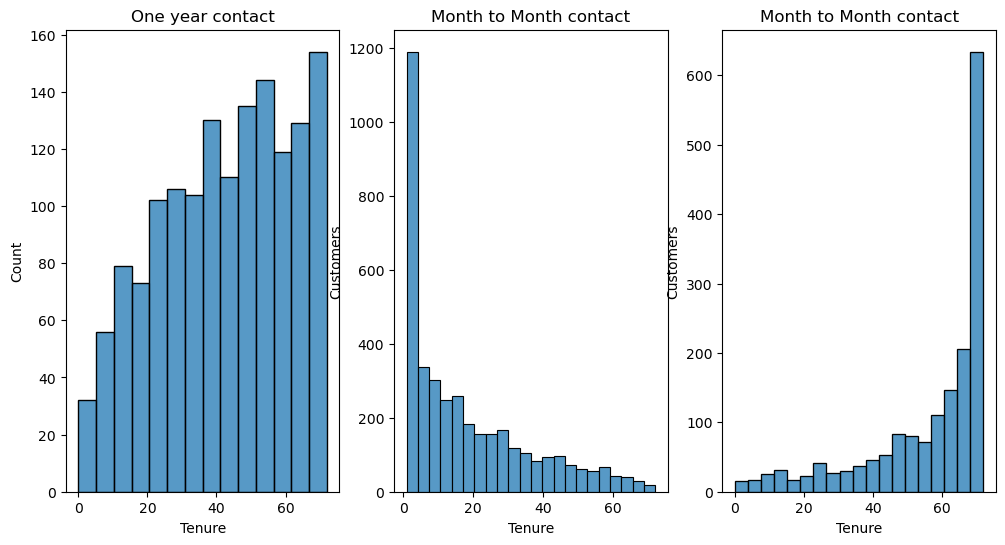

In [38]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.histplot(telco[telco["Contract"]=="One year"]['tenure'],kde=False)
plt.xlabel("Tenure")
plt.title("One year contact")

plt.subplot(1,3,2)
sns.histplot(telco[telco["Contract"]=="Month-to-month"]["tenure"],kde=False)
plt.ylabel("Customers")
plt.xlabel("Tenure")
plt.title("Month to Month contact")

plt.subplot(1,3,3)
sns.histplot(telco[telco["Contract"]=="Two year"]["tenure"],kde=False)
plt.ylabel("Customers")
plt.xlabel("Tenure")
plt.title("Month to Month contact")
plt.show()
plt.show()

In [39]:
telco["tenure"]

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

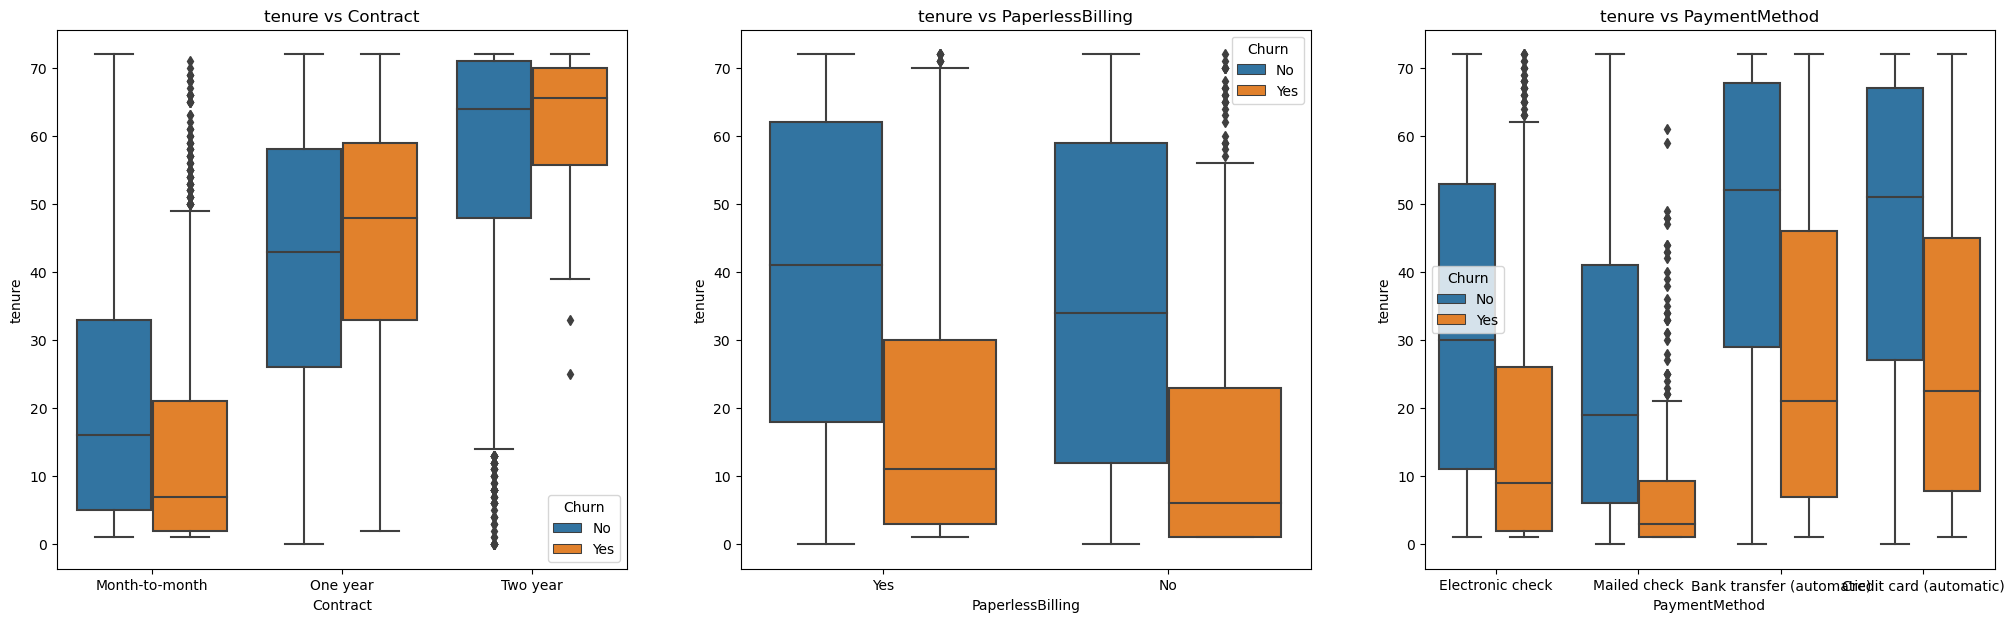

In [40]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
for i in range(len(cat_accinfo_features)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = cat_accinfo_features[i],y = 'tenure',data = telco,hue = 'Churn');
    plt.title('tenure vs ' + cat_accinfo_features[i]);

# Task 4 : Visualizations

Create various visualizations for deeper
insights (e.g., box plots, pair
plots)

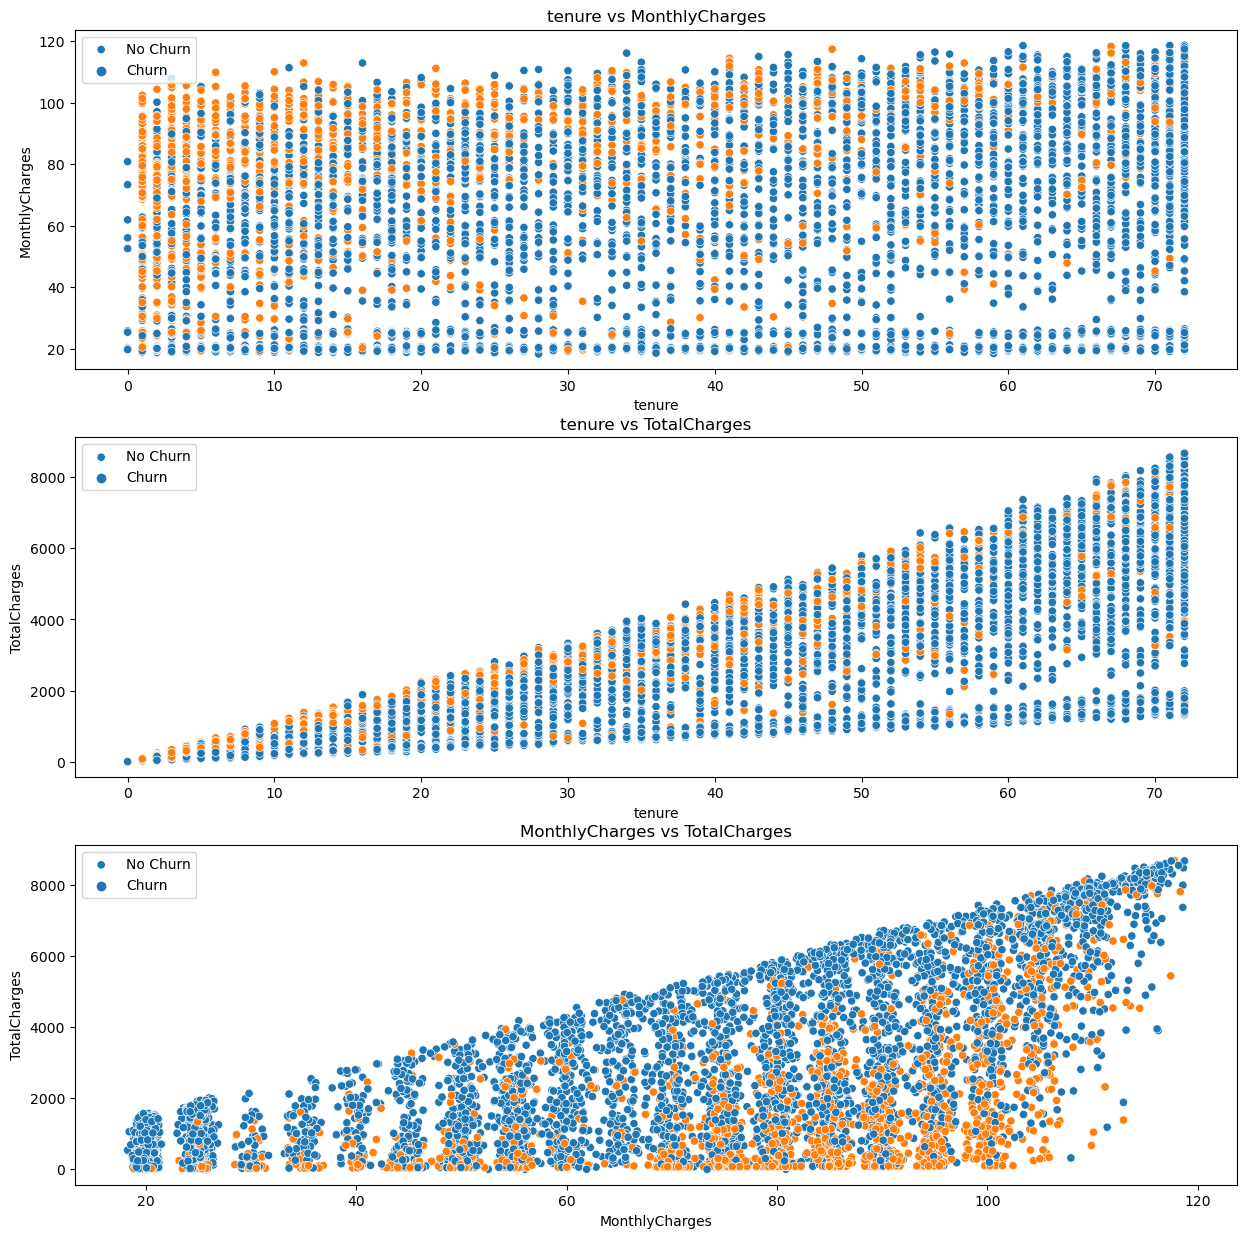

In [53]:
a = 0
fig,ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(num_accinfo_features)):
    for j in range(len(num_accinfo_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(3,1,a)
            sns.scatterplot(x = num_accinfo_features[i],y = num_accinfo_features[j],data = telco,hue = 'Churn');
            plt.legend(['No Churn','Churn'],loc = 'upper left',)
            title = num_accinfo_features[i] + ' vs ' + num_accinfo_features[j]
            plt.title(title)

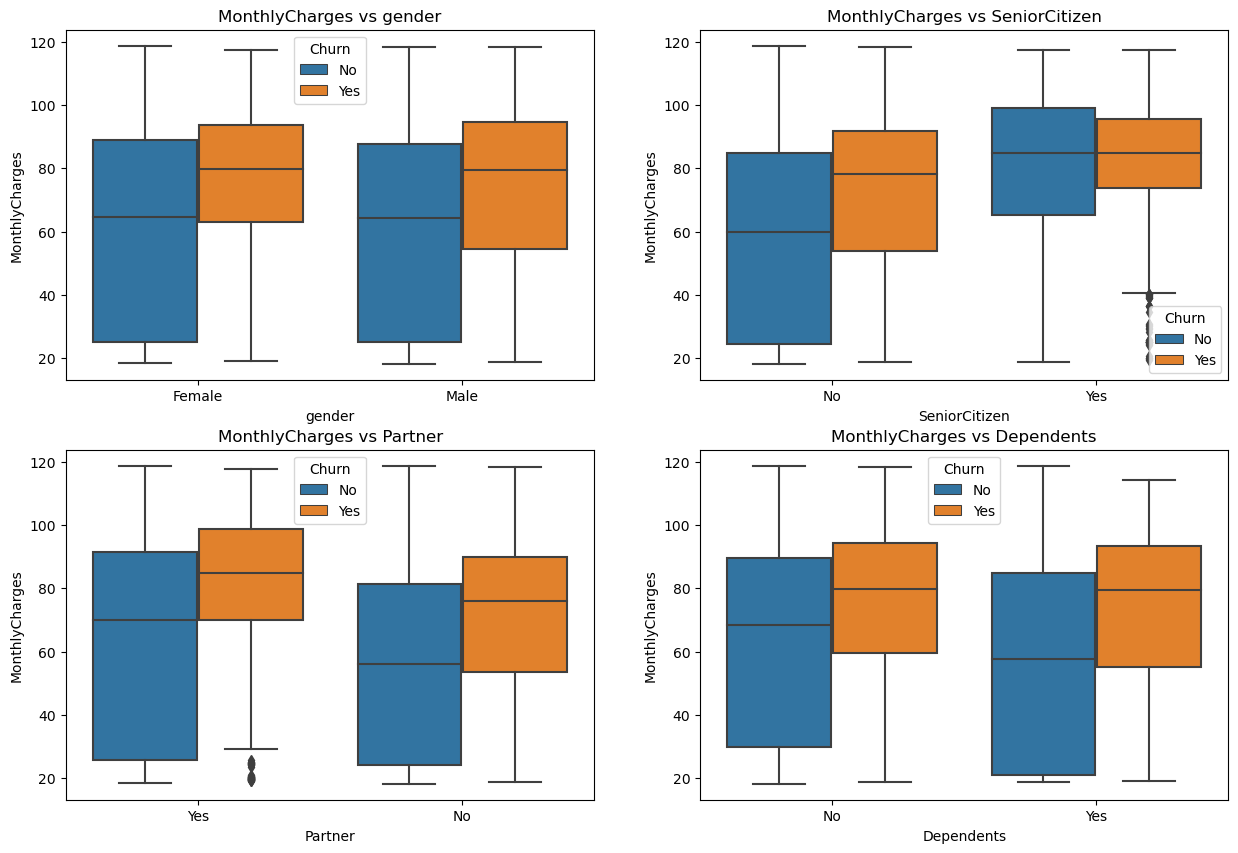

In [59]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = demo_features[i],y = 'MonthlyCharges',data = telco,hue = 'Churn'); 
    plt.title('MonthlyCharges vs ' + demo_features[i]);

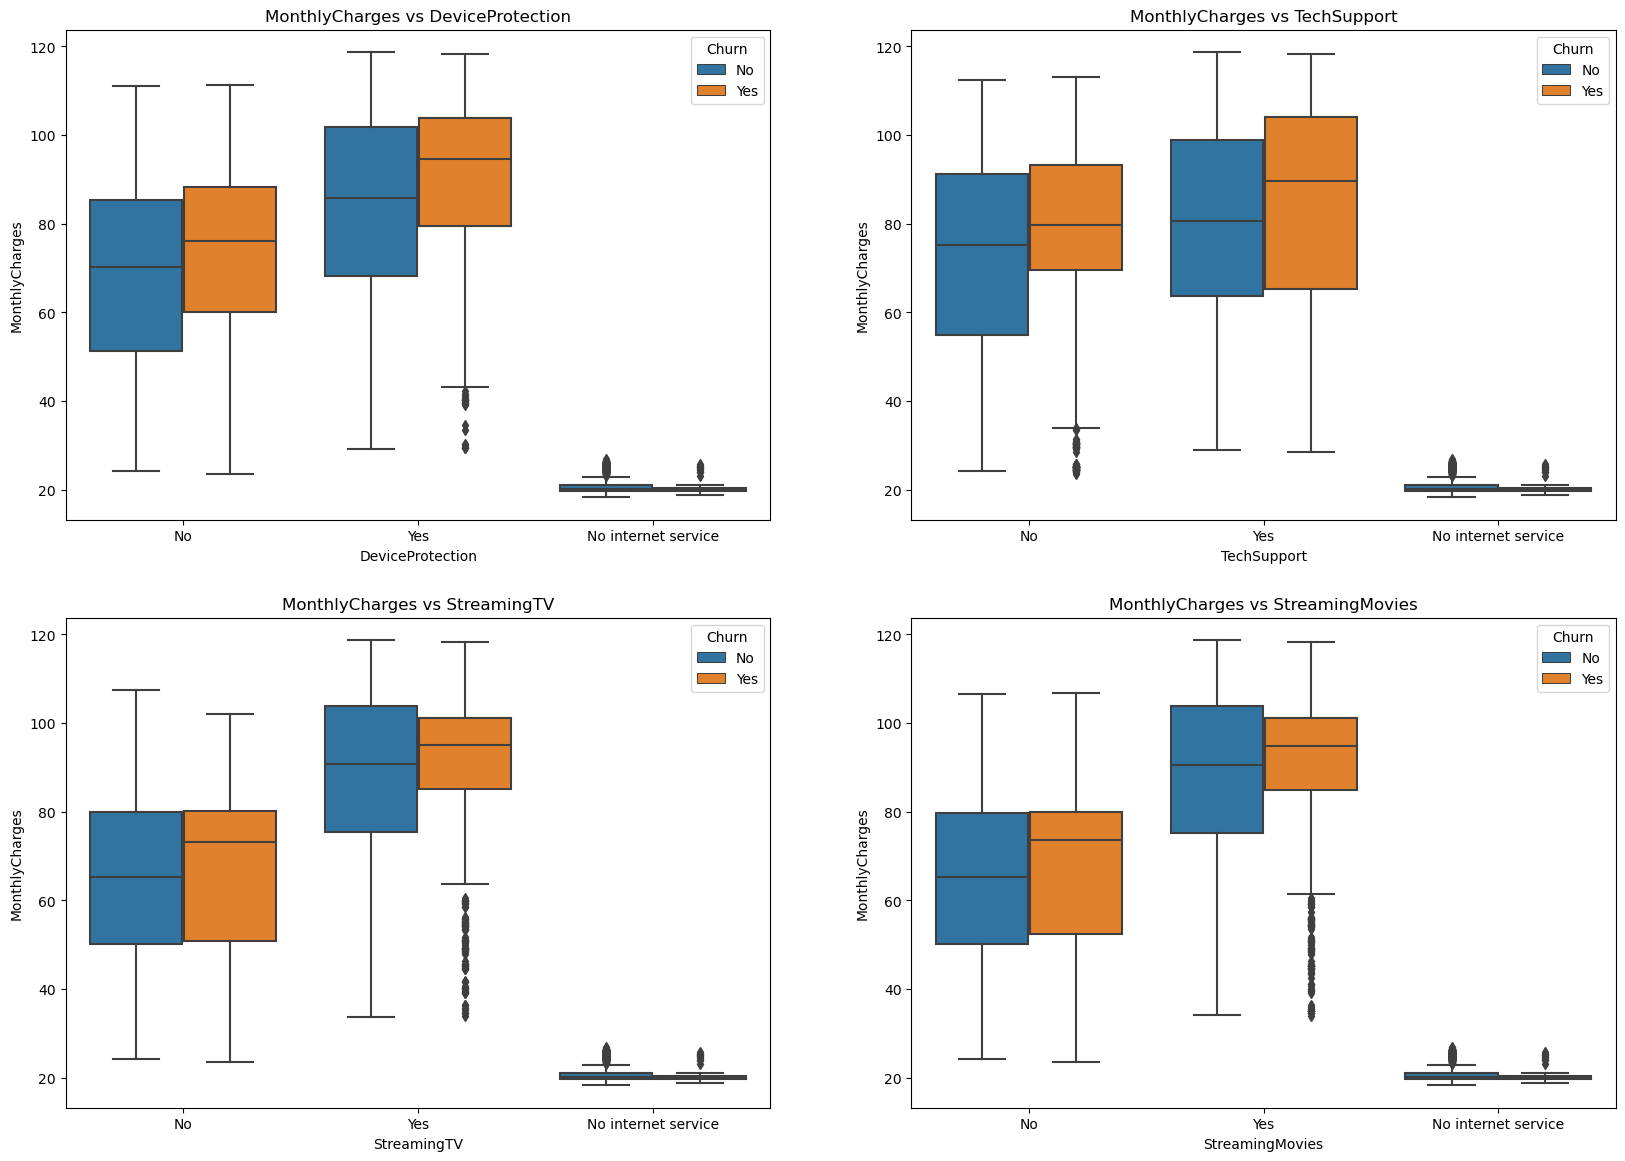

In [57]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(serv_features1[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = serv_features1[i - 4],y = 'MonthlyCharges',data = telco,hue = 'Churn');
    plt.title('MonthlyCharges vs ' + serv_features1[i-4]);

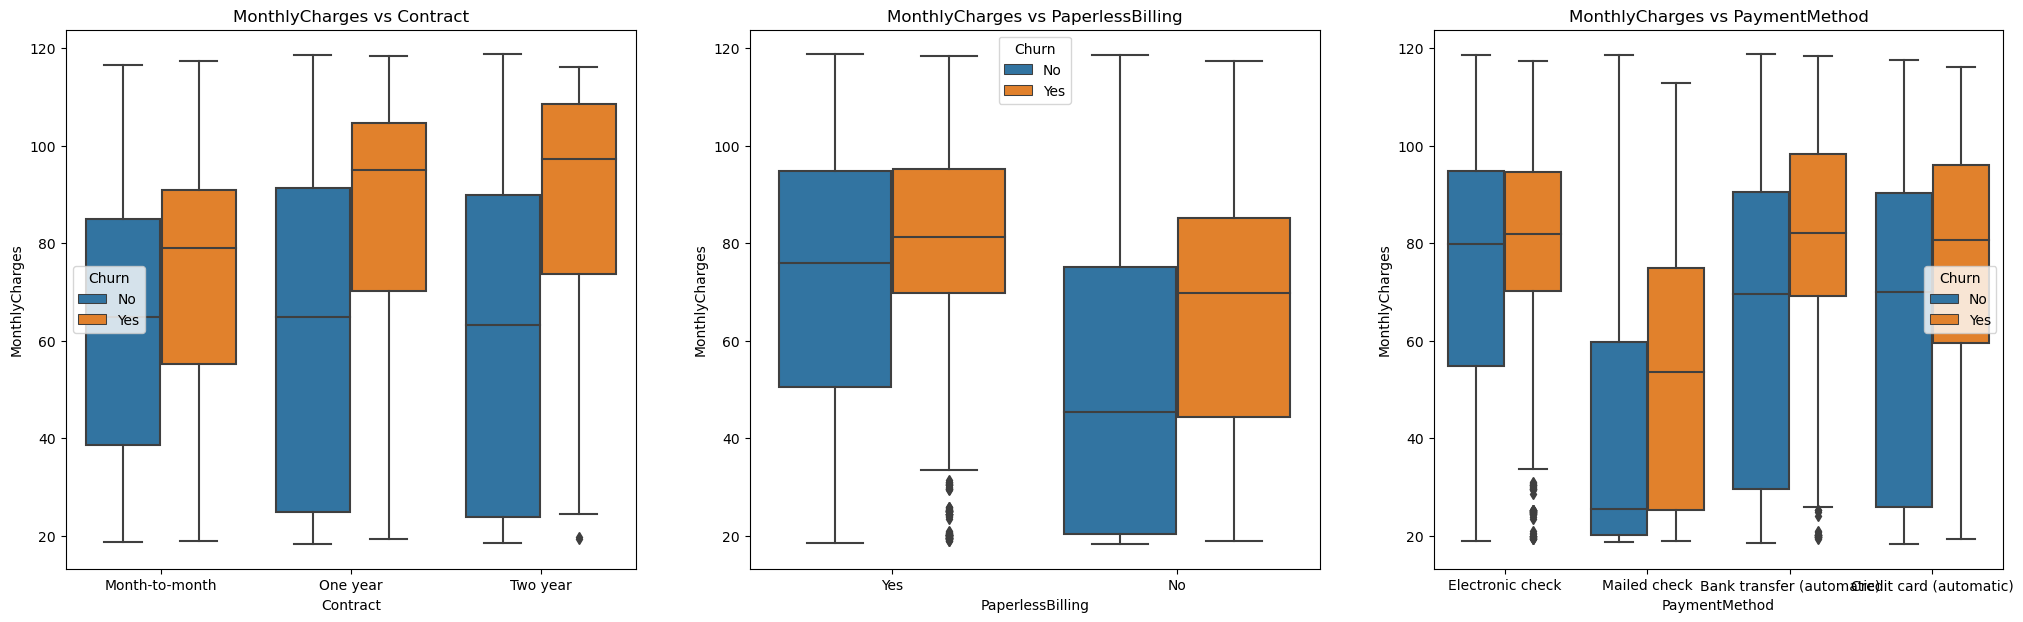

In [61]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

for i in range(len(cat_accinfo_features)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = cat_accinfo_features[i],y = 'MonthlyCharges',data = telco,hue = 'Churn');
    title = 'MonthlyCharges vs ' + cat_accinfo_features[i]
    plt.title(title);